# LinearRegression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject


In [2]:
data = pd.read_csv(r'C:\Users\VIVEK\OneDrive\Desktop\AI-ML\CSV files\winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Our target variable is alcohol and there is no use with the quality . So, we remove it

In [3]:
data = data.iloc[:,:-1]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Now Checking for the missing values in the data

In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

From the above we can say that there is no missing values in the data. Now, we check for the outliers in the data.

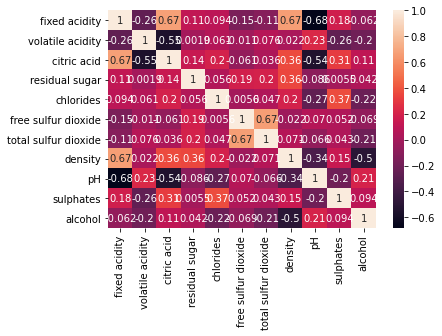

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

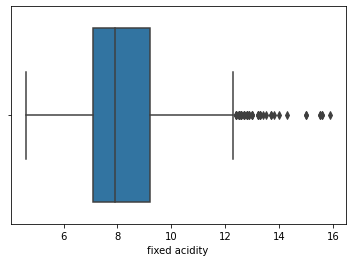

In [13]:
sns.boxplot(data['fixed acidity']);

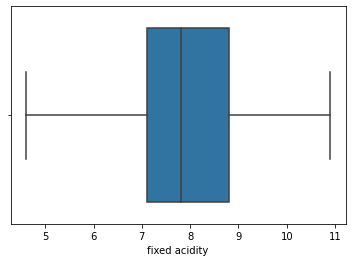

In [16]:
data = data[data['fixed acidity']<11]
sns.boxplot(data['fixed acidity'])

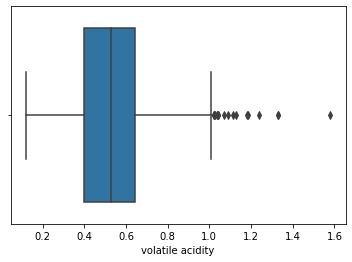

In [17]:
sns.boxplot(data['volatile acidity'])

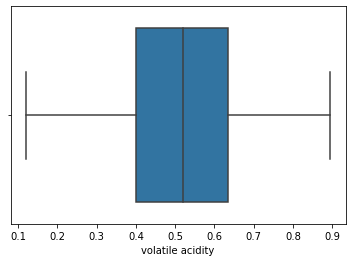

In [18]:
data = data[data['volatile acidity']<0.9]
sns.boxplot(data['volatile acidity'])

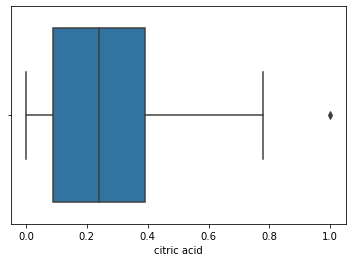

In [19]:
sns.boxplot(data['citric acid'])

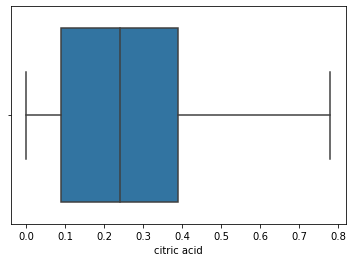

In [20]:
data = data[data['citric acid']<0.8]
sns.boxplot(data['citric acid'])

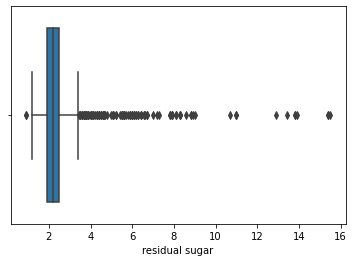

In [21]:
sns.boxplot(data['residual sugar'])

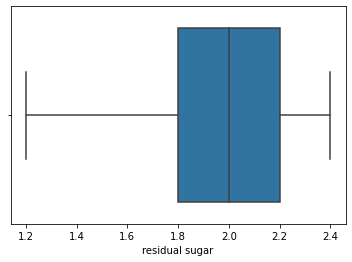

In [22]:
data = data[data['residual sugar']<2.5]
data = data[data['residual sugar']>1]
sns.boxplot(data['residual sugar'])

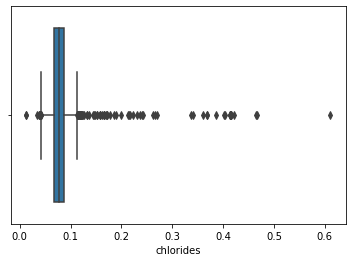

In [23]:
sns.boxplot(data['chlorides'])

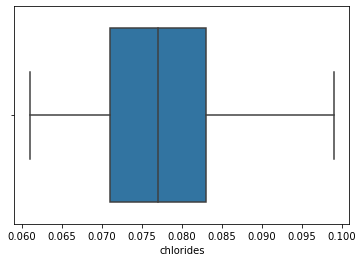

In [25]:
data = data[data['chlorides']<0.10]
data = data[data['chlorides']>0.06]
sns.boxplot(data['chlorides'])

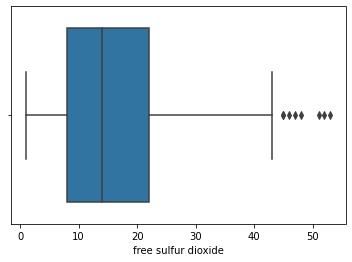

In [26]:
sns.boxplot(data['free sulfur dioxide'])

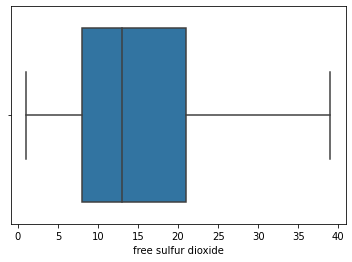

In [27]:
data = data[data['free sulfur dioxide']<40]
sns.boxplot(data['free sulfur dioxide'])

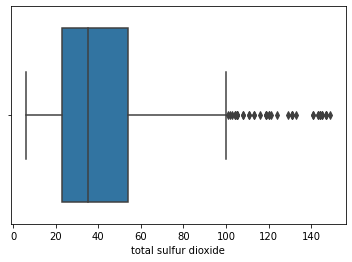

In [28]:
sns.boxplot(data['total sulfur dioxide'])

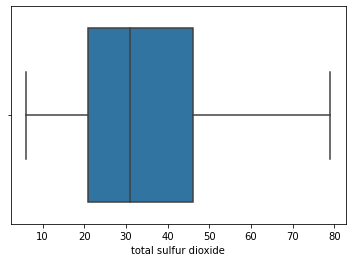

In [29]:
data = data[data['total sulfur dioxide']<80]
sns.boxplot(data['total sulfur dioxide'])

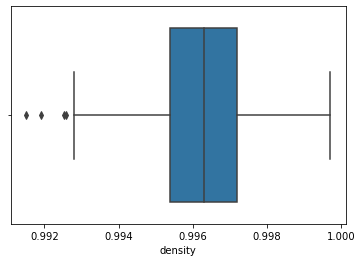

In [30]:
sns.boxplot(data['density'])

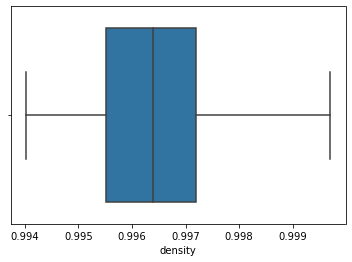

In [31]:
data = data[data['density']>0.994]
sns.boxplot(data['density']);

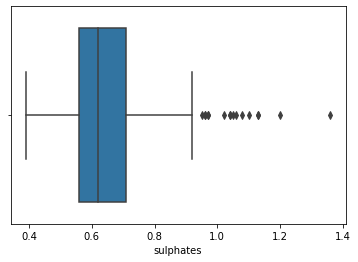

In [32]:
sns.boxplot(data['sulphates'])

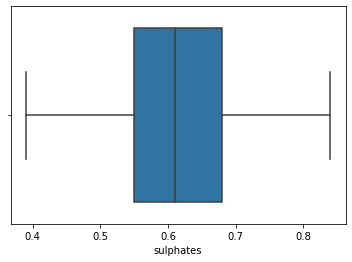

In [33]:
data = data[data['sulphates']<0.85]
sns.boxplot(data['sulphates']);

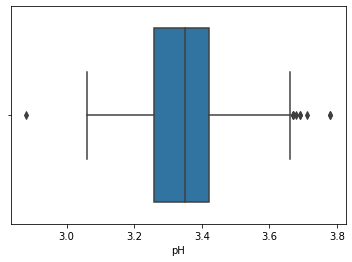

In [36]:
sns.boxplot(data['pH'])

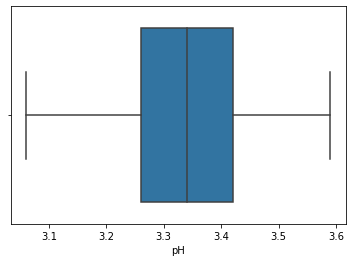

In [37]:
data = data[data['pH']<3.6]
data = data[data['pH']>3]
sns.boxplot(data['pH']);


In [38]:
data.shape

(534, 11)

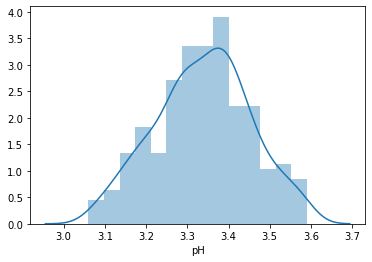

In [40]:
sns.distplot(data['pH'])

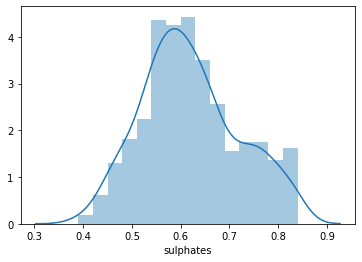

In [41]:
sns.distplot(data['sulphates'])

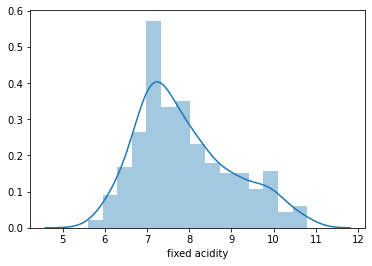

In [42]:
sns.distplot(data['fixed acidity']);

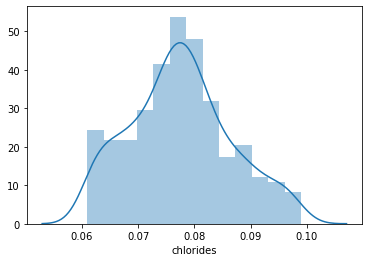

In [43]:
sns.distplot(data['chlorides']);

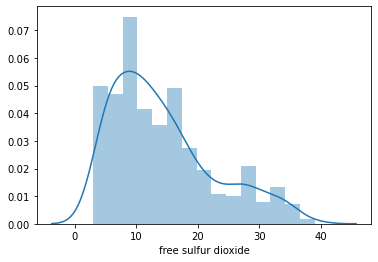

In [44]:
sns.distplot(data['free sulfur dioxide']);

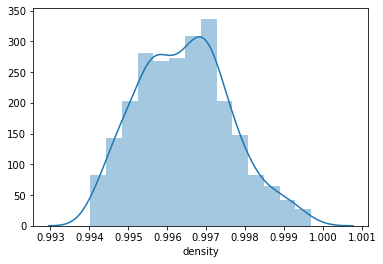

In [45]:
sns.distplot(data['density'])

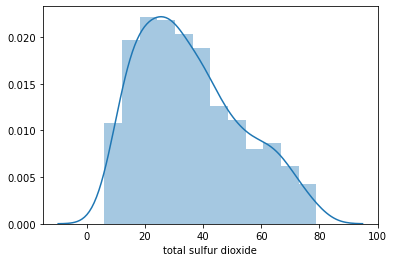

In [46]:
sns.distplot(data['total sulfur dioxide'])

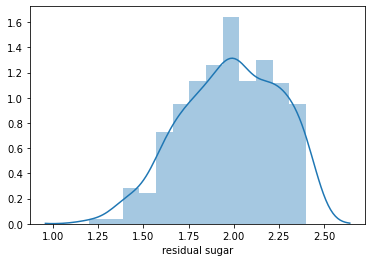

In [47]:
sns.distplot(data['residual sugar'])

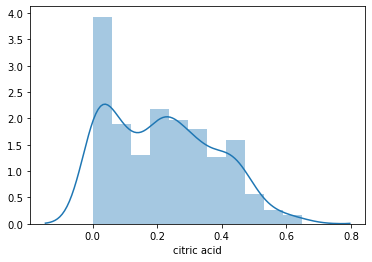

In [48]:
sns.distplot(data['citric acid'])

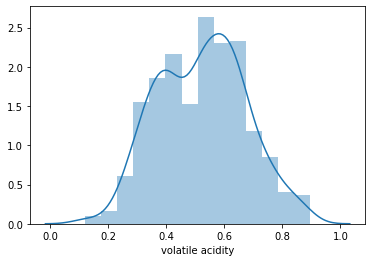

In [49]:
sns.distplot(data['volatile acidity'])

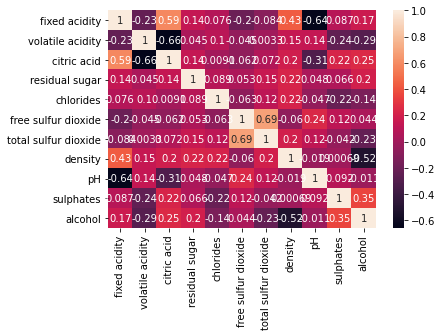

In [50]:
sns.heatmap(data.corr(),annot=True)

In [51]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [52]:
x.shape

(534, 10)

In [53]:
y.shape

(534, 1)

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [59]:
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [60]:
ypred = lin_reg.predict(xtest)

In [61]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7256415596901943